In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.19.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original x_train shape: (60000, 28, 28)
Original y_train shape: (60000,)

Processed x_train shape: (60000, 28, 28, 1)
Processed y_train shape: (60000, 10)
Example label (original): 5
Example label (one-hot): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


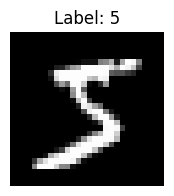

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Original x_train shape: {x_train.shape}")
print(f"Original y_train shape: {y_train.shape}")

# --- Preprocessing ---

# 1. Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. Reshape data to add the channel dimension (1 for grayscale)
# (60000, 28, 28) -> (60000, 28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 3. One-hot encode the labels
# We have 10 classes (digits 0-9)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# --- Verification ---
print(f"\nProcessed x_train shape: {x_train.shape}")
print(f"Processed y_train shape: {y_train.shape}")
print(f"Example label (original): {np.argmax(y_train[0])}")
print(f"Example label (one-hot): {y_train[0]}")

# Let's visualize the first image
plt.figure(figsize=(2,2))
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.title(f"Label: {np.argmax(y_train[0])}")
plt.axis('off')
plt.show()

In [3]:
def build_model():
    model = models.Sequential()

    # --- Convolutional Block 1 ---
    # Input: 28x28x1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    # Output: 13x13x32

    # --- Convolutional Block 2 ---
    # Input: 13x13x32
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    # Output: 5x5x64

    # --- Classifier Head ---
    # Flatten the 3D output to 1D
    model.add(layers.Flatten())

    # Fully-connected hidden layer
    model.add(layers.Dense(64, activation='relu'))

    # Dropout for regularization
    model.add(layers.Dropout(0.5))

    # Output layer (10 classes, softmax activation)
    model.add(layers.Dense(10, activation='softmax'))

    return model

model = build_model()

# Print a summary of the model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
print("Starting training...")

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test))

print("Training finished!")

Starting training...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7282 - loss: 0.8240 - val_accuracy: 0.9751 - val_loss: 0.0778
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9436 - loss: 0.1885 - val_accuracy: 0.9848 - val_loss: 0.0461
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9616 - loss: 0.1301 - val_accuracy: 0.9875 - val_loss: 0.0387
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9710 - loss: 0.1002 - val_accuracy: 0.9885 - val_loss: 0.0333
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9745 - loss: 0.0882 - val_accuracy: 0.9901 - val_loss: 0.0300
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9763 - loss: 0.0787 - val_accuracy: 0.9910 - val_loss: 0.0266
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9798 - loss: 0.0668 - val_accuracy: 0.9907 - val_loss: 0.0278
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9799 - loss: 0.

In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"\nTest loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 - 1s - 4ms/step - accuracy: 0.9922 - loss: 0.0247

Test loss: 0.0247
Test accuracy: 99.22%


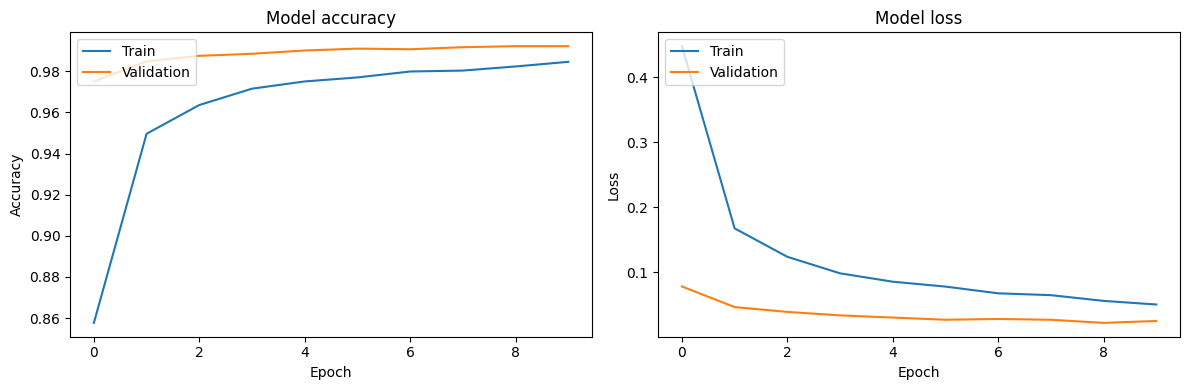

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [1]:
git pull origin main https://github.com/BolluSaiSrinivas16/mnist_cnn.git

SyntaxError: invalid syntax (ipython-input-3364270346.py, line 1)